In [ ]:
#writed by qyl

In [2]:
### 载入数据
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
train = pd.read_csv('./data/total_data.csv')

In [14]:
train.shape

(40001, 8)

In [15]:
train.dtypes

label      int64
num        int64
weekend    int64
weekday    int64
h1         int64
h2         int64
h3         int64
h4         int64
dtype: object

In [16]:
train.head(2)

,label,num,weekend,weekday,h1,h2,h3,h4
0,5,21952,23341,59412,37163,48282,55269,47585
1,1,218,723,1549,1600,3013,3290,3205


In [6]:
target=train['label']

In [7]:
target.head(2)

0    5
1    1
Name: label, dtype: int64

In [27]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [28]:
target.head(2)

0    5
1    6
Name: label, dtype: int64

In [8]:
#train.drop('label',axis=1,inplace=True)

In [1]:
#train.head(2)

In [17]:
train['ratio']=train['weekend']/(train['weekday']+0.1)#+0.1是为了避免分母为0

In [18]:
train['h']=train['h1']

In [19]:
#四个时段访问的次数选最大
for i in range(len(train['h1'])):
    Max=max(train['h1'][i],train['h2'][i],train['h3'][i],train['h4'][i])
    if Max==train['h1'][i]:
        train['h'][i]=0
    elif Max==train['h2'][i]:
        train['h'][i]=1
    elif Max==train['h3'][i]:
        train['h'][i]=2
    else:
        train['h'][i]=3

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/qyl/anaconda3/envs/DL_py35/lib/py

In [21]:
train['h'].head(3)

0    2
1    2
2    1
Name: h, dtype: int64

In [147]:
#train.drop(['h1','h2','h3','h4'],axis=1,inplace=True)

In [148]:
#train.drop(['weekday','weekend'],axis=1,inplace=True)

In [22]:
train.head(3)

,label,num,weekend,weekday,h1,h2,h3,h4,ratio,h
0,5,21952,23341,59412,37163,48282,55269,47585,0.392866,2
1,1,218,723,1549,1600,3013,3290,3205,0.466723,2
2,2,220,445,1243,526,2141,1953,877,0.357976,1


In [23]:
data=train #拷贝一份

In [24]:
#对类别的one-hot编码
data = pd.get_dummies(data, columns=['h'])
data.columns

Index(['label', 'num', 'weekend', 'weekday', 'h1', 'h2', 'h3', 'h4', 'ratio',
       'h_0', 'h_1', 'h_2', 'h_3'],
      dtype='object')

In [25]:
data.head(3)

,label,num,weekend,weekday,h1,h2,h3,h4,ratio,h_0,h_1,h_2,h_3
0,5,21952,23341,59412,37163,48282,55269,47585,0.392866,0,0,1,0
1,1,218,723,1549,1600,3013,3290,3205,0.466723,0,0,1,0
2,2,220,445,1243,526,2141,1953,877,0.357976,0,1,0,0


In [26]:
#data.to_csv('./data/total_data_processed.csv',index=False)#将处理完毕的特征都写入一个.csv,读出来可直接用于训练

In [152]:
#归一化,但xgboost其实不需要归一化，该步骤可有可无
train['number'] = (train['number'] - train['number'].min()) / (train['number'].max() - train['number'].min())

In [33]:
data.drop('label',axis=1,inplace=True)

In [34]:
data.head(2)

,num,weekend,weekday,h1,h2,h3,h4,ratio,h_0,h_1,h_2,h_3
0,21952,23341,59412,37163,48282,55269,47585,0.392866,0,0,1,0
1,218,723,1549,1600,3013,3290,3205,0.466723,0,0,1,0


In [35]:
### 数据分割
from sklearn.model_selection import train_test_split                 # 载入数据分割函数train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,        # 特征空间
                                                 target,      # 输出空间
                                                 test_size = 0.1,    # 测试集占10%
                                                 random_state = 33)  # 为了复现实验，设置一个随机数

In [36]:
x_train.shape,y_train.shape

((36000, 12), (36000,))

In [37]:
x_test.shape,y_test.shape

((4001, 12), (4001,))

In [39]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score
import xgboost as xgb
import xgboost as xgb
import pandas as pd
import numpy as np

In [44]:
### 模型相关
from xgboost import XGBClassifier
#model = XGBClassifier()               # 载入模型（模型命名为model)
model=XGBClassifier(
        learning_rate =0.1,
        n_estimators=2000, 
        max_depth=3,
        min_child_weight=3, 
        gamma=0.2, 
        subsample=0.7,
        colsample_bytree=0.9,
        objective= 'binary:logistic',
        nthread=4, 
        scale_pos_weight=1,
        seed=27
        )
model.fit(x_train,y_train)            # 训练模型（训练集）
y_pred = model.predict(x_test)        # 模型预测（测试集），y_pred为预测结果
print('Finished')

Finished


/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
### 性能度量
from sklearn.metrics import accuracy_score   # 准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))


accuarcy: 51.71%


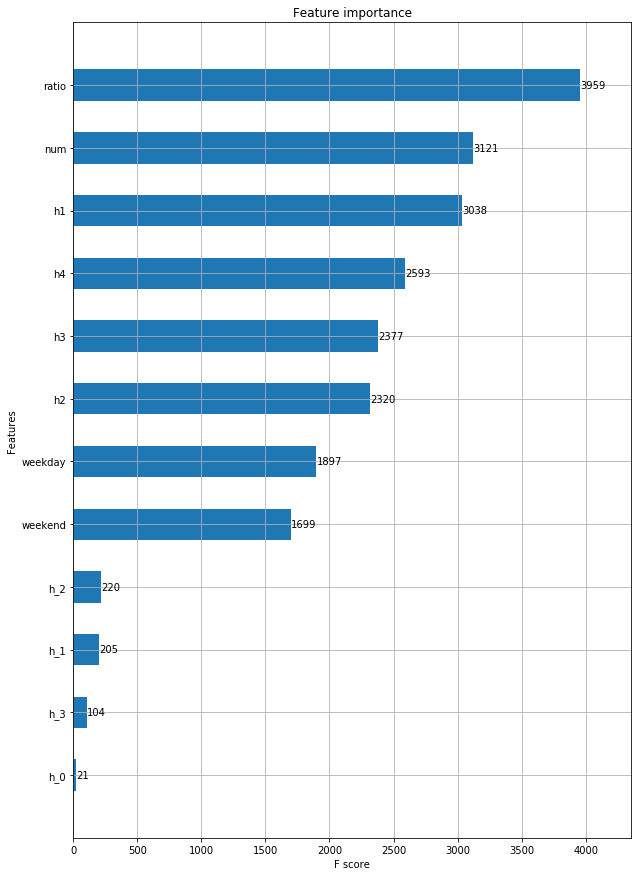

In [171]:
### 特征重要性
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,15))
plot_importance(model,height=0.5,max_num_features=12,ax=ax)
plt.show()

# 接下来是xgboost的调参

In [152]:
param_test0 = {
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[390,405,415,425,435]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
        n_estimators=410, 
        max_depth=3,
        min_child_weight=3, 
        gamma=0.2, 
        subsample=0.7,
        colsample_bytree=0.9,
        objective= 'binary:logistic',
        nthread=4, 
        scale_pos_weight=1,
        seed=27), 
                       param_grid = param_test0,n_jobs=4,iid=False, cv=5)
gsearch0.fit(x_train,y_train)

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=410, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.7),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [390, 405, 415, 425, 435], 'learning_rate': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [153]:
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

([mean: 0.47444, std: 0.01118, params: {'n_estimators': 390, 'learning_rate': 0.1},
  mean: 0.47445, std: 0.00989, params: {'n_estimators': 405, 'learning_rate': 0.1},
  mean: 0.47346, std: 0.00779, params: {'n_estimators': 415, 'learning_rate': 0.1},
  mean: 0.47405, std: 0.00844, params: {'n_estimators': 425, 'learning_rate': 0.1},
  mean: 0.47265, std: 0.00861, params: {'n_estimators': 435, 'learning_rate': 0.1},
  mean: 0.46069, std: 0.01943, params: {'n_estimators': 390, 'learning_rate': 0.01},
  mean: 0.46010, std: 0.02035, params: {'n_estimators': 405, 'learning_rate': 0.01},
  mean: 0.46049, std: 0.02001, params: {'n_estimators': 415, 'learning_rate': 0.01},
  mean: 0.46069, std: 0.01878, params: {'n_estimators': 425, 'learning_rate': 0.01},
  mean: 0.46209, std: 0.01903, params: {'n_estimators': 435, 'learning_rate': 0.01},
  mean: 0.42978, std: 0.02161, params: {'n_estimators': 390, 'learning_rate': 0.001},
  mean: 0.42997, std: 0.02130, params: {'n_estimators': 405, 'learnin

In [57]:
#对subsample 和 max_features 用grid search查找最好的参数
param_test1 = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
#Grid seach选择合适的gamma
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                        min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.47630, std: 0.01619, params: {'gamma': 0.0},
  mean: 0.47294, std: 0.01732, params: {'gamma': 0.1},
  mean: 0.47720, std: 0.01765, params: {'gamma': 0.2},
  mean: 0.47473, std: 0.01985, params: {'gamma': 0.3},
  mean: 0.47114, std: 0.02049, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.47719854572155773)

In [51]:
### 性能度量
from sklearn.metrics import accuracy_score   # 准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))


accuarcy: 46.50%


In [58]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.47204, std: 0.01579, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: 0.47630, std: 0.01619, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: 0.47450, std: 0.01899, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.46665, std: 0.02126, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: 0.47091, std: 0.01552, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: 0.47294, std: 0.01976, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.46643, std: 0.01733, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.46799, std: 0.01684, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: 0.46754, std: 0.01861, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: 0.45947, std: 0.01535, params: {'min_child_weight': 1, 'max_depth': 9},
  mean: 0.46216, std: 0.01225, params: {'min_child_weight': 3, 'max_depth': 9},
  mean: 0.46754, std: 0.01798, params: {'min_child_weight': 5, 'max_depth': 9}],
 {'max_depth': 3, 'min_child_weight': 3

In [61]:
#对subsample 和 colsample_bytree用grid search寻找最合适的参数
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
                                        min_child_weight=3, gamma=0.2, subsample=0.7, colsample_bytree=0.9,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train,y_train)

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=177,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'subsample': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.47137, std: 0.01357, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.47137, std: 0.01556, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.47272, std: 0.01367, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.46978, std: 0.01787, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.47069, std: 0.01142, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.46822, std: 0.01812, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.47114, std: 0.01867, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.46822, std: 0.01561, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.47113, std: 0.01560, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.47070, std: 0.01524, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.46958, std: 0.01339, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.47158, std: 0.01829, params: {'colsample_bytree': 0.8, 'subsample'

In [120]:
#对reg_alpha用grid search寻找最合适的参数
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
        n_estimators=450, 
        max_depth=3,
        min_child_weight=3, 
        gamma=0.2, 
        subsample=0.7,
        colsample_bytree=0.9,
        objective= 'binary:logistic',
        nthread=4, 
        scale_pos_weight=1,
        seed=27),  param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(x_train,y_train)

/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qyl/anaconda3/envs/DL_py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=450, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.7),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [121]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.47265, std: 0.00988, params: {'reg_alpha': 1e-05},
  mean: 0.46987, std: 0.01175, params: {'reg_alpha': 0.01},
  mean: 0.47107, std: 0.01380, params: {'reg_alpha': 0.1},
  mean: 0.47484, std: 0.00976, params: {'reg_alpha': 1},
  mean: 0.38089, std: 0.01222, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.4748421231968531)